In [2]:
from pyspark.sql import SparkSession


In [3]:
spark = SparkSession.builder.appName('food').getOrCreate()

In [6]:
data = spark.read.csv(r"C:\Users\Asus\Desktop\studia big data\Python-and-Spark-for-Big-Data-master\Spark_for_Machine_Learning\Clustering\hack_data.csv", inferSchema = True, header = True)

In [8]:
data

['Session_Connection_Time',
 'Bytes Transferred',
 'Kali_Trace_Used',
 'Servers_Corrupted',
 'Pages_Corrupted',
 'Location',
 'WPM_Typing_Speed']

In [9]:
data.printSchema

<bound method DataFrame.printSchema of DataFrame[Session_Connection_Time: double, Bytes Transferred: double, Kali_Trace_Used: int, Servers_Corrupted: double, Pages_Corrupted: double, Location: string, WPM_Typing_Speed: double]>

In [10]:
data.head(5)

[Row(Session_Connection_Time=8.0, Bytes Transferred=391.09, Kali_Trace_Used=1, Servers_Corrupted=2.96, Pages_Corrupted=7.0, Location='Slovenia', WPM_Typing_Speed=72.37),
 Row(Session_Connection_Time=20.0, Bytes Transferred=720.99, Kali_Trace_Used=0, Servers_Corrupted=3.04, Pages_Corrupted=9.0, Location='British Virgin Islands', WPM_Typing_Speed=69.08),
 Row(Session_Connection_Time=31.0, Bytes Transferred=356.32, Kali_Trace_Used=1, Servers_Corrupted=3.71, Pages_Corrupted=8.0, Location='Tokelau', WPM_Typing_Speed=70.58),
 Row(Session_Connection_Time=2.0, Bytes Transferred=228.08, Kali_Trace_Used=1, Servers_Corrupted=2.48, Pages_Corrupted=8.0, Location='Bolivia', WPM_Typing_Speed=70.8),
 Row(Session_Connection_Time=20.0, Bytes Transferred=408.5, Kali_Trace_Used=0, Servers_Corrupted=3.57, Pages_Corrupted=8.0, Location='Iraq', WPM_Typing_Speed=71.28)]

In [12]:
data.columns

['Session_Connection_Time',
 'Bytes Transferred',
 'Kali_Trace_Used',
 'Servers_Corrupted',
 'Pages_Corrupted',
 'Location',
 'WPM_Typing_Speed']

In [13]:
from pyspark.ml.clustering import KMeans

In [14]:
from pyspark.ml.feature import VectorAssembler

In [15]:
assembler = VectorAssembler(inputCols=['Session_Connection_Time' ,
                                       'Bytes Transferred',
 'Kali_Trace_Used',
 'Servers_Corrupted',
 'Pages_Corrupted', 'WPM_Typing_Speed'], outputCol='features')

In [16]:
from pyspark.ml.feature import StandardScaler

In [17]:
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')

In [19]:
model_as = assembler.transform(data)

In [20]:
model_as

DataFrame[Session_Connection_Time: double, Bytes Transferred: double, Kali_Trace_Used: int, Servers_Corrupted: double, Pages_Corrupted: double, Location: string, WPM_Typing_Speed: double, features: vector]

In [43]:
dada = scaler.fit(model_as)

In [44]:
cluster_final = dada.transform(model_as)

In [45]:
k2 = KMeans(featuresCol='scaled_features', k=2)

In [46]:
k3 = KMeans(featuresCol='scaled_features', k=3)

In [66]:
k4 = KMeans(featuresCol='scaled_features', k=4)

In [47]:
hack2 = k2.fit(cluster_final)

In [48]:
hack3 = k3.fit(cluster_final)

In [67]:
hack4 = k4.fit(cluster_final)

In [68]:
model4 = hack4.transform(cluster_final)

In [69]:
model4.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   83|
|         3|   84|
|         2|   88|
|         0|   79|
+----------+-----+



In [49]:
model2 = hack2.transform(cluster_final)

In [50]:
model2.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  167|
|         0|  167|
+----------+-----+



In [51]:
model3 = hack3.transform(cluster_final)

In [52]:
model3.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   83|
|         2|   84|
|         0|  167|
+----------+-----+



In [58]:
wssse_values = []
for k in range(2,9):
    kmeans = KMeans().setK(k).setFeaturesCol('scaled_features')  # Poprawne ustawienie liczby klastrów i kolumny z cechami
    model = kmeans.fit(cluster_final)  # Trenowanie modelu
    wssse = model.summary.trainingCost
    wssse_values.append(wssse)

In [59]:
wssse_values

[601.7707512676691,
 434.1492898715821,
 267.1336116887894,
 252.95706084839765,
 231.25146190309118,
 213.00247952464343,
 196.20007771931003]

In [60]:
import matplotlib.pyplot as plt

In [64]:
k_values = range(2, 9)

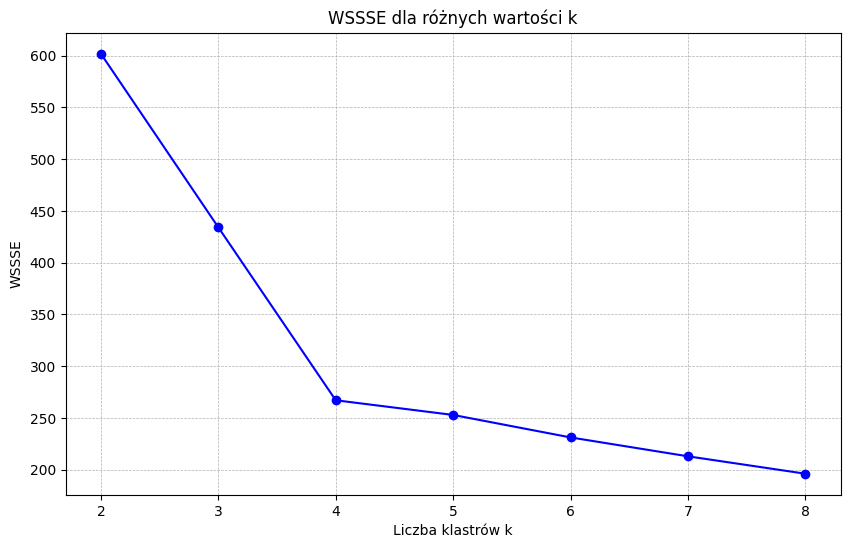

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, wssse_values, '-o', color='blue')
plt.title('WSSSE dla różnych wartości k')
plt.xlabel('Liczba klastrów k')
plt.ylabel('WSSSE')
plt.xticks(k_values)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
data.